In [1]:
%matplotlib inline

import numpy as np
import pydicom as pyd
import SimpleITK as sitk
import os
import matplotlib.pyplot as plt
import cv2
from utils import dcm_2_img

In [12]:
dcm_file_name_template = '/media/tx-deepocean/Data/dataset/frature/fracture_mini_datasets/2018_04_17_LuoChaofeng_Ylf/dcm/WHTJ1517088252T125/WHTJ1517088252T125_{:03d}.dcm'

dcm_folder = '/media/tx-deepocean/Data/dataset/frature/fracture_mini_datasets/2018_04_17_LuoChaofeng_Ylf/dcm/WHTJ1517088252T125'

In [7]:
def extract_sagittal_img(dcm_folder, data_shape=None):
    dcm_files = sorted(os.listdir(dcm_folder))
    num_sample = len(dcm_files)
    if data_shape is None:
        dcm = pyd.dcmread(os.path.join(dcm_folder, dcm_files[0]))
        data_shape = (num_sample, dcm.pixel_array.shape[0])
    
    sagittal = np.zeros(shape=data_shape)
    
    for i, f in enumerate(dcm_files):
        dcm = pyd.dcmread(os.path.join(dcm_folder, f))
        sagittal[i] = dcm.pixel_array[:, dcm.pixel_array.shape[1]//2]
    return sagittal
    
    

In [8]:
sagittal_dcm =  extract_sagittal_img(dcm_folder)

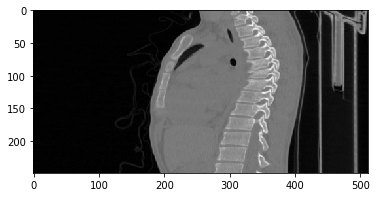

In [9]:
plt.imshow(sagittal_dcm, cmap='gray')

In [13]:
dcm = pyd.dcmread(dcm_file_name_template.format(100))

In [14]:
st = dcm.SliceThickness
sbs = dcm.SpacingBetweenSlices

In [15]:
resized = cv2.resize(sagittal_dcm, None, fx=1, fy=(sbs/st), interpolation=cv2.INTER_CUBIC)
resized.shape

(1992, 512)

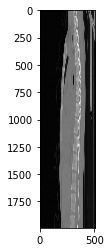

In [16]:
plt.imshow(resized, cmap='gray')

In [17]:
target_slice_thickness = 1
one_mm = cv2.resize(sagittal_dcm, None, fx=1, fy=(sbs/st), interpolation=cv2.INTER_CUBIC)

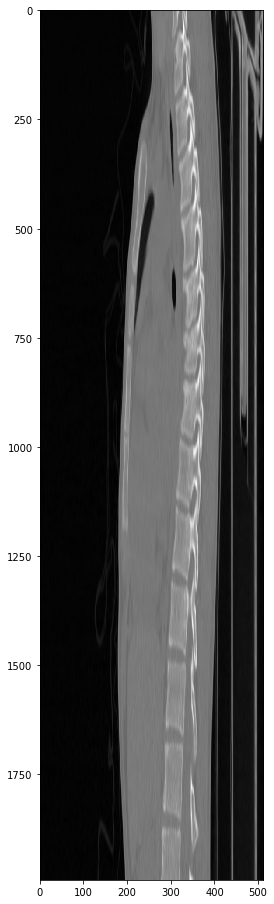

In [18]:
plt.figure(figsize=(8,16))
plt.imshow(one_mm, cmap='gray')

In [19]:
img = dcm_2_img(one_mm, dcm.RescaleIntercept, dcm.RescaleSlope)

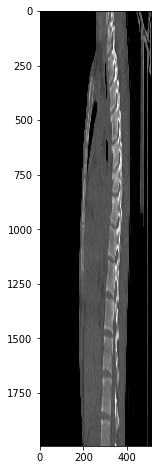

In [20]:
plt.figure(figsize=(4,8))
plt.imshow(img, cmap='gray')